## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.



## The notebook consist of below 4 parts

* Data Understanding, Preparation, and Pre-Processing
* Exploratory Data Analysis 
* Feature Engineering and Variable Transformation
* Model Selection, Model Building, and  Prediction

### Data Understanding, Preparation, and Pre-Processing

#### Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
df=pd.read_csv("train (1).csv")
df_test=pd.read_csv("test (1).csv")
df_solution=pd.read_csv("solution (1).csv")



In [3]:
#checking shape of data
df.shape

(69999, 172)

In [4]:
df_test.shape

(30000, 171)

In [5]:
#  combining so that in the end we can predict & calculate the accuracy over test data set
df_test = pd.merge(df_test ,df_solution , how = "inner", on = "id" )

In [6]:
df_test.shape

(30000, 172)

In [7]:
## checking sample of data
pd.set_option("display.max_rows", 200)
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [8]:
#checking null values and data types in columns
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

##### The dataset has 135 float columns, 28 integer and 9 string type columns.
##### Out of 70k records, many columns have less than 20k values in them. They have only 25% of values. So we can drop them in Feature engineering section

In [9]:
#checking new shape
df.shape

(69999, 172)

In [10]:
#dropping rows having all null values
df=df.dropna(axis=0,how='all')
df_test=df_test.dropna(axis=0,how='all')

In [11]:
#checking new shape
df.shape

(69999, 172)

##### There is not change in rows of original dataset after dropping rows with all null values. This means no row has all null values in dataset.

##### Checking if in a columns all values are unique or contains a single not null value in all rows because these columns do not add much information to model

In [12]:
# calculating unique values of each column and checking on that
k=df.nunique()
j=k[(k.values ==1) | (k.values==69999)]
j.index

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [13]:
#keeping the date column
j=['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [14]:
#dropping the columns 
df.drop(j,axis=1,inplace=True)
df_output=df_test['id']
df_test.drop(j,axis=1,inplace=True)

In [15]:
#checking new shape
df.shape

(69999, 161)

In [16]:
df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

##### we can see that we have around 62K data for loyal customers and around 7k data for churned customer

In [17]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 161 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    last_date_of_month_6      69999 non-null  object 
 1    last_date_of_month_7      69600 non-null  object 
 2    last_date_of_month_8      69266 non-null  object 
 3    arpu_6                    69999 non-null  float64
 4    arpu_7                    69999 non-null  float64
 5    arpu_8                    69999 non-null  float64
 6    onnet_mou_6               67231 non-null  float64
 7    onnet_mou_7               67312 non-null  float64
 8    onnet_mou_8               66296 non-null  float64
 9    offnet_mou_6              67231 non-null  float64
 10   offnet_mou_7              67312 non-null  float64
 11   offnet_mou_8              66296 non-null  float64
 12   roam_ic_mou_6             67231 non-null  float64
 13   roam_ic_mou_7             67312 non-null  fl

In [18]:
#checking on object data types
df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6', 
    'last_date_of_month_7', 'last_date_of_month_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,6/30/2014,7/31/2014,8/31/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/23/2014,8/20/2014


In [19]:
##### converting string to dates
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'])
df['date_of_last_rech_data_6']=pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7']=pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8']=pd.to_datetime(df['date_of_last_rech_data_8'])
df['last_date_of_month_6']=pd.to_datetime(df['last_date_of_month_6'])
df['last_date_of_month_7']=pd.to_datetime(df['last_date_of_month_7'])
df['last_date_of_month_8']=pd.to_datetime(df['last_date_of_month_8'])

##### converting string to dates
df_test['date_of_last_rech_6']=pd.to_datetime(df_test['date_of_last_rech_6'])
df_test['date_of_last_rech_7']=pd.to_datetime(df_test['date_of_last_rech_7'])
df_test['date_of_last_rech_8']=pd.to_datetime(df_test['date_of_last_rech_8'])
df_test['date_of_last_rech_data_6']=pd.to_datetime(df_test['date_of_last_rech_data_6'])
df_test['date_of_last_rech_data_7']=pd.to_datetime(df_test['date_of_last_rech_data_7'])
df_test['date_of_last_rech_data_8']=pd.to_datetime(df_test['date_of_last_rech_data_8'])
df_test['last_date_of_month_6']=pd.to_datetime(df_test['last_date_of_month_6'])
df_test['last_date_of_month_7']=pd.to_datetime(df_test['last_date_of_month_7'])
df_test['last_date_of_month_8']=pd.to_datetime(df_test['last_date_of_month_8'])

In [20]:
df['last_date_of_month_6'].isna().sum()

0

##### Filling null values in date columns with mode

In [21]:
df['date_of_last_rech_6'].fillna(value=df['date_of_last_rech_6'].mode(),inplace=True)
df['date_of_last_rech_7'].fillna(value=df['date_of_last_rech_7'].mode(),inplace=True)
df['date_of_last_rech_8'].fillna(value=df['date_of_last_rech_8'].mode(),inplace=True)

df_test['date_of_last_rech_6'].fillna(value=df_test['date_of_last_rech_6'].mode(),inplace=True)
df_test['date_of_last_rech_7'].fillna(value=df_test['date_of_last_rech_7'].mode(),inplace=True)
df_test['date_of_last_rech_8'].fillna(value=df_test['date_of_last_rech_8'].mode(),inplace=True)

### Ending "Data Understanding, Preparation, and Pre-Processing" Section

### Exploratory Data Analysis

#### Importing EDA Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Univariate Analysis on numeric columns

In [23]:
#starting with numerical columns
k=df.shape[1]
j=int(k/3)

for i,col in enumerate(df.describe().columns):
    plt.figure(figsize=(20, 140))
    plt.subplot(80,2,i+1)
    sns.boxplot(data=df,x=col)
plt.show()

##### All columns have some outliers in them. So we wont drop outliers from all columns

In [24]:
#creating list of categorical columns
catcols=[ i for i in df.columns if df[i].dtype not in ["int64", "float64"] ]
len(catcols)

9

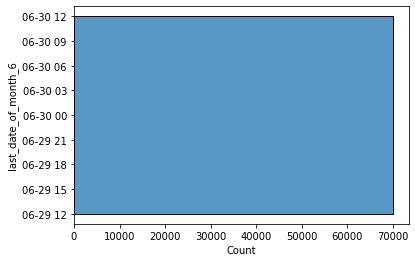

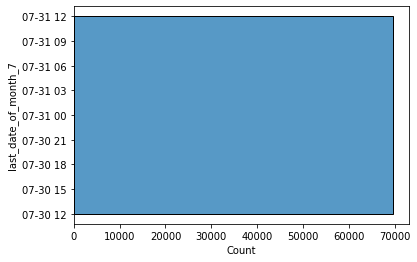

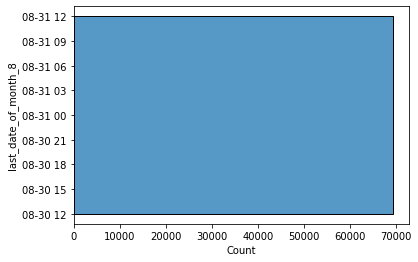

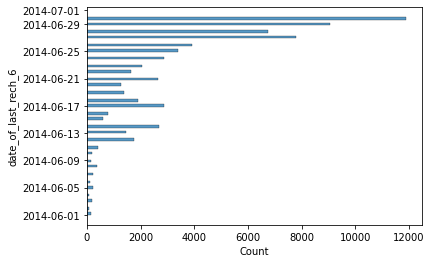

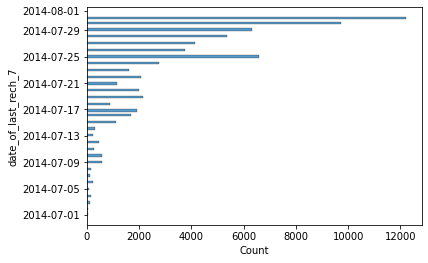

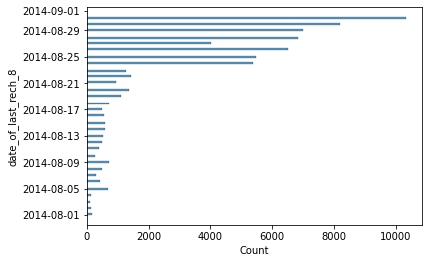

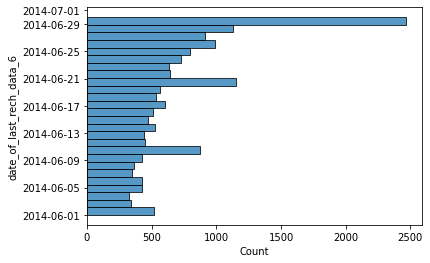

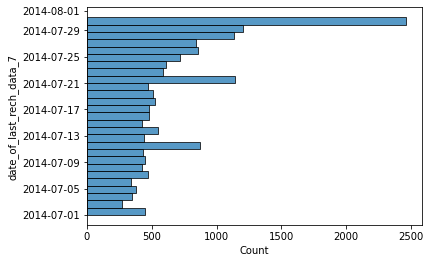

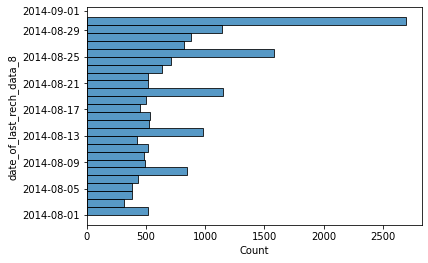

In [25]:
#ploting histplot on all categorical columns
for i in catcols:
    plt.figure(i)
    sns.histplot(data=df,y=i)

##### we can observe here that at the end of each month, the number of records are more.

#### Bivariate Analysis on numeric columns

###### Correlation matrix among columns

<AxesSubplot:>

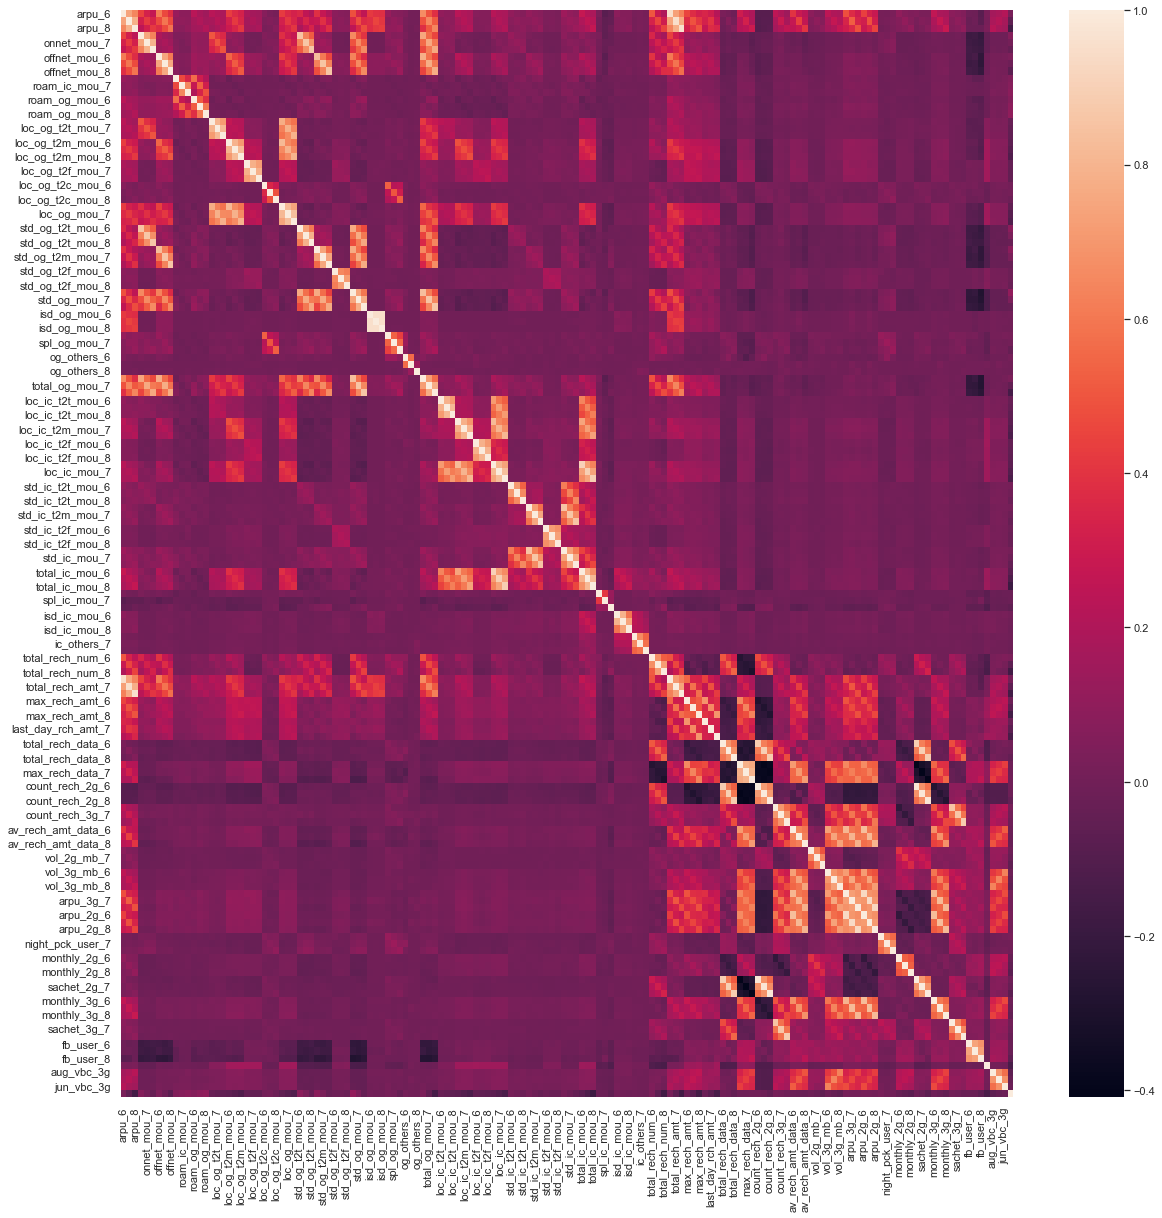

In [26]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df.corr())

##### The heatmap is not showing all the columns. Let see the correlation with churn_probability column

In [27]:
pd.set_option("display.max_rows", 200)
df.corr()['churn_probability'].sort_values()

total_ic_mou_8       -0.187566
total_rech_num_8     -0.167043
total_rech_amt_8     -0.160455
max_rech_amt_8       -0.159131
arpu_8               -0.157566
total_og_mou_8       -0.149325
last_day_rch_amt_8   -0.139611
aon                  -0.135177
loc_ic_mou_8         -0.128784
loc_ic_t2m_mou_8     -0.124840
total_ic_mou_7       -0.120197
loc_og_t2m_mou_8     -0.113309
loc_og_mou_8         -0.108821
loc_ic_t2m_mou_7     -0.099544
loc_ic_mou_7         -0.098318
loc_og_t2m_mou_7     -0.088988
loc_og_mou_7         -0.087851
monthly_2g_8         -0.076254
max_rech_amt_7       -0.073366
offnet_mou_8         -0.072591
sachet_2g_8          -0.071103
total_ic_mou_6       -0.070951
loc_ic_mou_6         -0.069804
last_day_rch_amt_7   -0.069795
loc_ic_t2m_mou_6     -0.068057
total_rech_amt_7     -0.063978
loc_ic_t2f_mou_8     -0.063645
fb_user_8            -0.063580
aug_vbc_3g           -0.063040
loc_ic_t2t_mou_8     -0.062971
total_rech_num_7     -0.062956
loc_og_t2m_mou_6     -0.062760
loc_og_m

##### we can observer that  below columns are highly correlated with churn_probability as compared to other columns   
total_ic_mou_8     
total_rech_num_8   
total_rech_amt_8   
max_rech_amt_8     
arpu_8             
total_og_mou_8     
last_day_rch_amt_8 
aon                
total_ic_mou_7     
loc_ic_mou_8   
std_og_mou_6  

##### lets check the higher correlation values

In [28]:
k=df.corr()
#filtering correlated values between .7 to 1 and -.5 to -1
k=k[((k>.7) & (k<1)) | ((k<-.5)&(k>-1))]
#dropping rows having all null values in k
k=k.dropna(axis=0,how='all')
k=k.dropna(axis=1,how='all')
k.shape

(108, 108)

<AxesSubplot:>

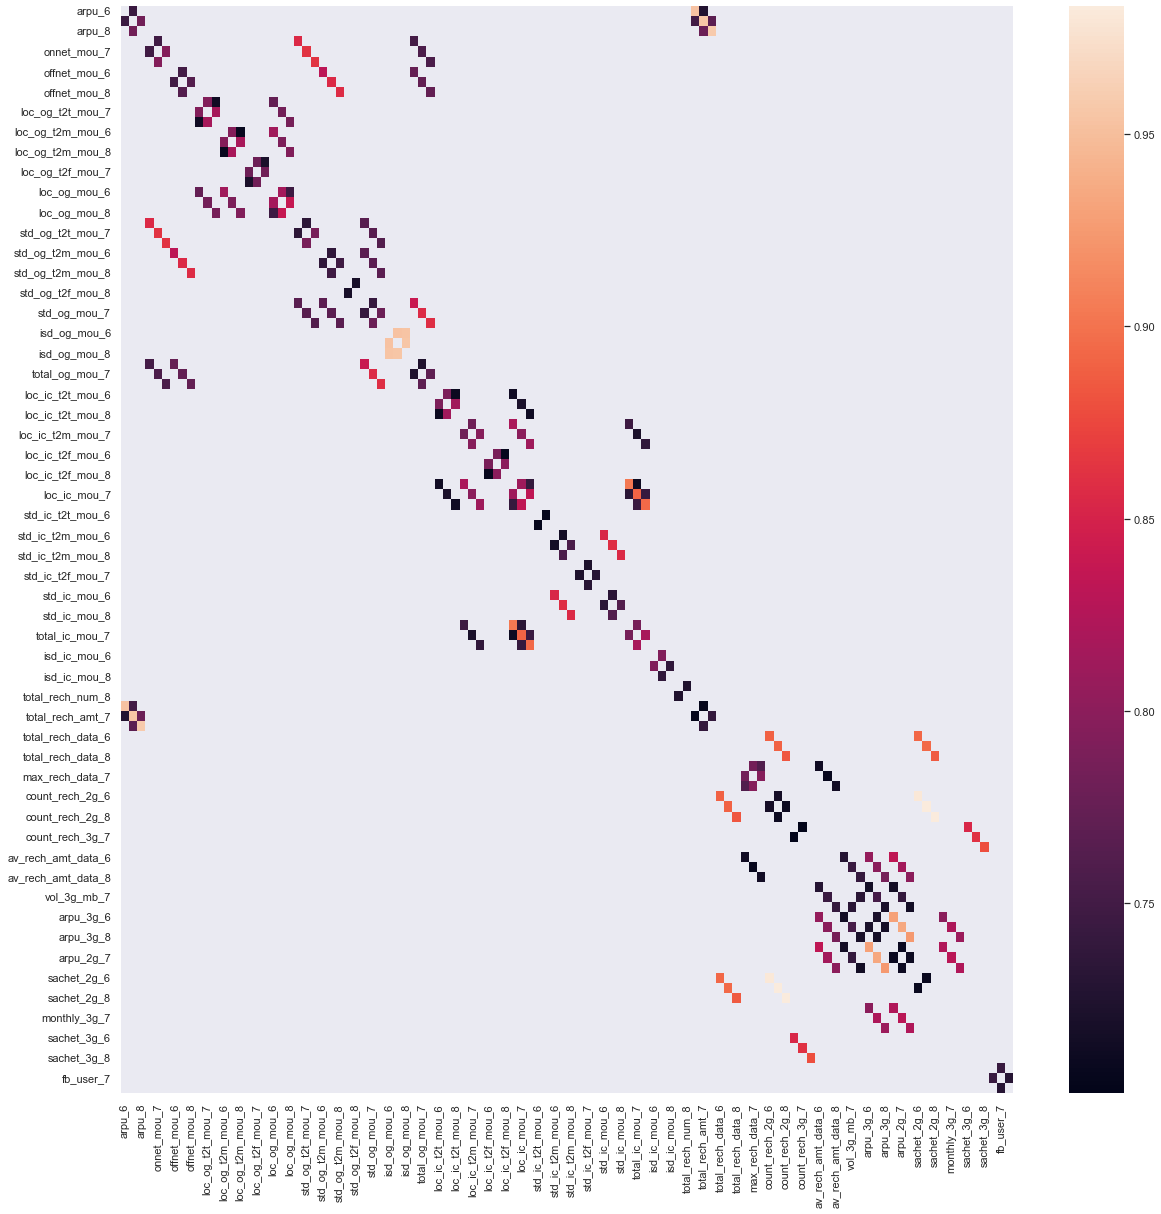

In [29]:
#visualising the filtered data
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(k)

##### We can observer here that the same metric in different months are highly correlated. Multicollinearity exists in data

In [30]:
# lets now conevrt AON in months
df['aon_mon'] = df['aon']/30
df_test['aon_mon'] = df_test['aon']/30
df.drop('aon', axis=1, inplace=True)
df_test.drop('aon', axis=1, inplace=True)
df['aon_mon'].head()

0    65.266667
1    23.666667
2    29.400000
3    32.733333
4    21.566667
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

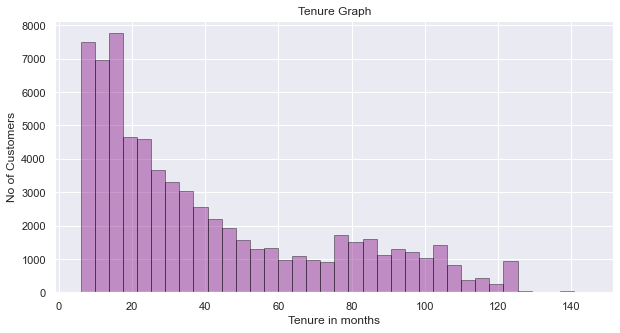

In [31]:
sns.set(rc = {'figure.figsize':(10,5)})
aon = sns.distplot(df['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
aon.set_ylabel('No of Customers')
aon.set_xlabel('Tenure in months')
aon.set_title('Tenure Graph')

In [32]:
tn_range = [0.0, 6.0, 12.0, 24.0, 60.0, 140.0]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['aon_mon'], tn_range,labels= tn_label)
df['tenure_range'].head()

0    5 Yrs and above
1            1-2 Yrs
2            2-5 Yrs
3            2-5 Yrs
4            1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

<AxesSubplot:>

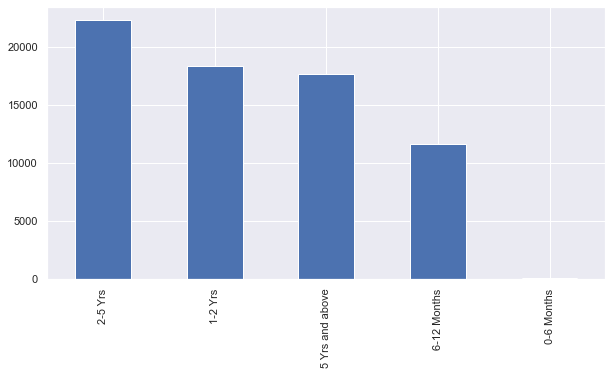

In [33]:
df['tenure_range'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='churn_probability', ylabel='aon_mon'>

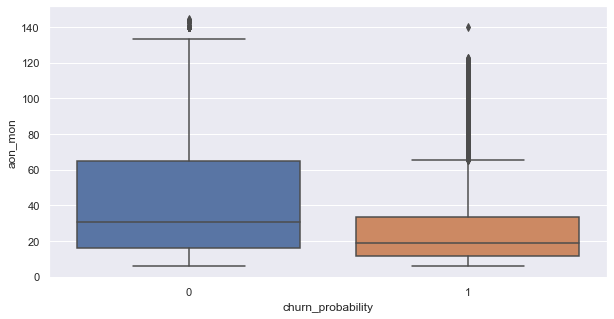

In [34]:
#Churn Vs Tenure Range
sns.boxplot(x = df.churn_probability, y = df.aon_mon)

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

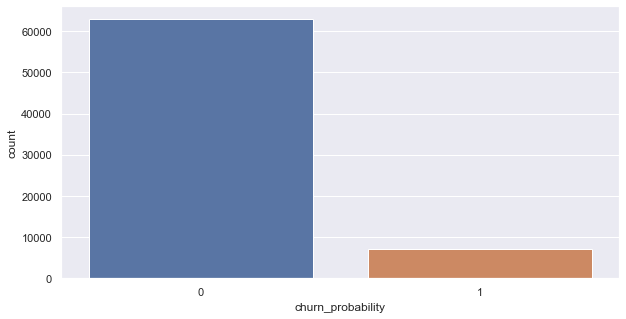

In [35]:
# Lets look at the churn rate 
sns.countplot(data=df,x='churn_probability')

### Ending "Exploratory Data Analysis" Section

### Feature Engineering and Variable Transformation

##### Importing Libraries

In [36]:
import numpy as np

In [37]:
pd.set_option("display.max_columns", 200)
df.head(1)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_mon,tenure_range
0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.0,0.0,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.2,0.63,0.0,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.0,0.0,0.0,3.26,24.76,24.71,0.0,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.0,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0,65.266667,5 Yrs and above


##### In the data we see below calculations.

##### onnet_mou_6=loc_og_t2t_mou_6+std_og_t2t_mou_6
##### onnet_mou_7=loc_og_t2t_mou_7+std_og_t2t_mou_7
##### onnet_mou_8=loc_og_t2t_mou_8+std_og_t2t_mou_8

##### offnet_mou_6=loc_og_t2m_mou_6+std_og_t2m_mou_6
##### offnet_mou_7=loc_og_t2m_mou_7+std_og_t2m_mou_7
##### offnet_mou_8=loc_og_t2m_mou_8+std_og_t2m_mou_8

##### std_og_mou_6=std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6
##### std_og_mou_7=std_og_t2m_mou_7+std_og_t2t_mou_7+std_og_t2f_mou_7
##### std_og_mou_8=std_og_t2m_mou_8+std_og_t2t_mou_8+std_og_t2f_mou_8

##### loc_og_mou_6=loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6+loc_og_t2c_mou_6
##### loc_og_mou_7=loc_og_t2m_mou_7+loc_og_t2t_mou_7+loc_og_t2f_mou_7+loc_og_t2c_mou_7
##### loc_og_mou_8=loc_og_t2m_mou_8+loc_og_t2t_mou_8+loc_og_t2f_mou_8+loc_og_t2c_mou_6

##### loc_ic_mou_6=loc_ic_t2m_mou_6+loc_ic_t2t_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6
##### loc_ic_mou_7=loc_ic_t2m_mou_7+loc_ic_t2t_mou_7+loc_ic_t2f_mou_7+loc_ic_t2c_mou_7
##### loc_ic_mou_8=loc_ic_t2m_mou_8+loc_ic_t2t_mou_8+loc_ic_t2f_mou_8+loc_ic_t2c_mou_8	

##### std_ic_mou_6=std_ic_t2m_mou_6+std_ic_t2t_mou_6+std_ic_t2f_mou_6
##### std_ic_mou_7=std_ic_t2m_mou_7+std_ic_t2t_mou_7+std_ic_t2f_mou_7
##### std_ic_mou_8=std_ic_t2m_mou_8+std_ic_t2t_mou_8+std_ic_t2f_mou_8

##### total_ic_mou_6=std_ic_mou_6+loc_ic_mou_6+spl_ic_mou_6+isd_ic_mou_6+ic_others_6
##### total_ic_mou_7=std_ic_mou_7+loc_ic_mou_7+spl_ic_mou_7+isd_ic_mou_7+ic_others_7
##### total_ic_mou_8=std_ic_mou_8+loc_ic_mou_8+spl_ic_mou_8+isd_ic_mou_8+ic_others_8

##### total_og_mou_6=std_og_mou_6+loc_og_mou_6+spl_og_mou_6+isd_og_mou_6+og_others_6
##### total_og_mou_7=std_og_mou_7+loc_og_mou_7+spl_og_mou_7+isd_og_mou_7+og_others_7
##### total_og_mou_8=std_og_mou_8+loc_og_mou_8+spl_og_mou_8+isd_og_mou_8+og_others_8

##### So we can keep the calculated columns and remove rest of columns. As we can see total calculations have summed up almost all columns. So we keep only that.

In [38]:
collist=['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7',
         'std_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2t_mou_6'
         ,'loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8'
         ,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7'
         ,'std_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_og_t2c_mou_6'
        ,'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'
        ,'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7',
        'std_og_t2f_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7',
        'offnet_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','loc_og_mou_6','loc_og_mou_7',
        'loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7',
         'std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7',
         'isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','spl_og_mou_6','spl_og_mou_7',
         'spl_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','og_others_6','og_others_7',
         'og_others_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','std_ic_t2t_mou_6',
         'std_ic_t2t_mou_7','std_ic_t2t_mou_8'
        ]
df.drop(columns=collist,inplace=True)
df_test.drop(columns=collist,inplace=True)

In [39]:
df.shape

(69999, 87)

In [40]:
pd.set_option("display.max_columns", 200)
df.head(2)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_mon,tenure_range
0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,0.0,0.0,0.0,0.0,0.0,0.0,81.21,221.68,3.63,11.84,53.04,40.56,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0,65.266667,5 Yrs and above
1,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,42.953,0.0,0.0,0.0,0.0,0.0,0.0,0.00,30.73,31.66,3.44,39.44,25.04,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,NaT,2014-07-08,NaT,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.0,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,0.0,0.0,0.0,0,23.666667,1-2 Yrs


##### Extracting the common name from variables and filling 0 in null values of columns. Summing up the columns to create one column in the end

In [41]:
col_list=['arpu_6','arpu_7','arpu_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6',
     'roam_og_mou_7','roam_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
     'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7',
     'total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','count_rech_2g_6',
     'count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
     'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7',
     'vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
     'arpu_2g_6','arpu_2g_7','arpu_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6',
     'monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','total_rech_data_6',
    'total_rech_data_7','total_rech_data_8','monthly_2g_6','monthly_2g_7','monthly_2g_8']
new_col_list=[]
for col in col_list:
    if col!='churn_probability' and (col[-1]=='6' or col[-1]=='7' or col[-1]=='8'):
        k=col.split('_')
        new_col_list.append('_'.join(k[:len(k)-1]))
        df[col].fillna(value=0,inplace=True)
new_col_list=list(set(new_col_list))
new_col_list

['av_rech_amt_data',
 'count_rech_3g',
 'arpu_3g',
 'arpu',
 'vol_3g_mb',
 'monthly_3g',
 'roam_og_mou',
 'sachet_3g',
 'total_rech_data',
 'total_rech_num',
 'arpu_2g',
 'vol_2g_mb',
 'roam_ic_mou',
 'count_rech_2g',
 'monthly_2g',
 'total_og_mou',
 'total_rech_amt',
 'total_ic_mou',
 'sachet_2g']

##### creating total columns and summing up all monthly values. even average values are directly dependent on total sum. so taking total sum

In [42]:
for i in new_col_list:
    df[i]=df[i+'_6']+df[i+'_7']+df[i+'_8']
    df_test[i]=df_test[i+'_6']+df_test[i+'_7']+df_test[i+'_8']

##### Dropping all other columns

In [43]:
for i in new_col_list:
    df.drop(columns=[i+'_6'],inplace=True)
    df.drop(columns=[i+'_7'],inplace=True)
    df.drop(columns=[i+'_8'],inplace=True)
    df_test.drop(columns=[i+'_6'],inplace=True)
    df_test.drop(columns=[i+'_7'],inplace=True)
    df_test.drop(columns=[i+'_8'],inplace=True)

##### Selecting maximum recharge amount and maximum data recharged
##### also from dates , calculating number of days since last recharge

In [44]:
for i in range(df.shape[0]):
    df.loc[i,'max_rech_amt']=max([df['max_rech_amt_6'][i],df['max_rech_amt_7'][i],df['max_rech_amt_8'][i]])
    df.loc[i,'max_rech_data']=max([df['max_rech_data_6'][i],df['max_rech_data_7'][i],df['max_rech_data_8'][i]])
    if df['fb_user_6'][i]>0 or df['fb_user_7'][i]>0 or df['fb_user_8'][i]>0:
        df.loc[i,'used_fb']=1
    else:
        df.loc[i,'used_fb']=0
for i in range(df_test.shape[0]):
    df_test.loc[i,'max_rech_amt']=max([df_test['max_rech_amt_6'][i],df_test['max_rech_amt_7'][i],df_test['max_rech_amt_8'][i]])
    df_test.loc[i,'max_rech_data']=max([df_test['max_rech_data_6'][i],df_test['max_rech_data_7'][i],df_test['max_rech_data_8'][i]])
    if df_test['fb_user_6'][i]>0 or df_test['fb_user_7'][i]>0 or df_test['fb_user_8'][i]>0:
        df_test.loc[i,'used_fb']=1
    else:
        df_test.loc[i,'used_fb']=0

In [45]:
df['vbc_3g']=df['aug_vbc_3g']+df['jul_vbc_3g']+df['jun_vbc_3g']
df['avg_days_till_last_rech_amt']=((df['last_date_of_month_6']-df['date_of_last_rech_6'])+
                                    (df['last_date_of_month_7']-df['date_of_last_rech_7'])+
                                    (df['last_date_of_month_8']-df['date_of_last_rech_8']))/3
df['avg_days_till_last_rech_data']=((df['last_date_of_month_6']-df['date_of_last_rech_data_6'])+
                                    (df['last_date_of_month_7']-df['date_of_last_rech_data_7'])+
                                    (df['last_date_of_month_8']-df['date_of_last_rech_data_8']))/3

df_test['vbc_3g']=df_test['aug_vbc_3g']+df_test['jul_vbc_3g']+df_test['jun_vbc_3g']
df_test['avg_days_till_last_rech_amt']=((df_test['last_date_of_month_6']-df_test['date_of_last_rech_6'])+
                                    (df_test['last_date_of_month_7']-df_test['date_of_last_rech_7'])+
                                    (df_test['last_date_of_month_8']-df_test['date_of_last_rech_8']))/3
df_test['avg_days_till_last_rech_data']=((df_test['last_date_of_month_6']-df_test['date_of_last_rech_data_6'])+
                                    (df_test['last_date_of_month_7']-df_test['date_of_last_rech_data_7'])+
                                    (df_test['last_date_of_month_8']-df_test['date_of_last_rech_data_8']))/3

In [46]:
df.drop(columns=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_data_6',
                 'max_rech_data_7','max_rech_data_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True)

df_test.drop(columns=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_data_6',
                 'max_rech_data_7','max_rech_data_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True)

In [47]:
df.head(2)

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,churn_probability,aon_mon,tenure_range,av_rech_amt_data,count_rech_3g,arpu_3g,arpu,vol_3g_mb,monthly_3g,roam_og_mou,sachet_3g,total_rech_data,total_rech_num,arpu_2g,vol_2g_mb,roam_ic_mou,count_rech_2g,monthly_2g,total_og_mou,total_rech_amt,total_ic_mou,sachet_2g,max_rech_amt,max_rech_data,used_fb,vbc_3g,avg_days_till_last_rech_amt,avg_days_till_last_rech_data
0,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,0,65.266667,5 Yrs and above,0.0,0.0,0.00,125.813,0.00,0,0.0,0,0.0,7,0.00,0.00,0.0,0.0,0,306.52,152,105.44,0,65.0,NaN,0.0,0.0,12 days 00:00:00,NaT
1,0,0,0,NaN,0.0,NaN,NaN,1.0,NaN,0,23.666667,1-2 Yrs,145.0,1.0,122.07,165.740,3.96,1,0.0,0,1.0,12,122.08,352.91,0.0,0.0,0,62.39,195,67.92,0,145.0,NaN,1.0,0.0,14 days 16:00:00,NaT


In [48]:
df.shape

(69999, 37)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   last_day_rch_amt_6            69999 non-null  int64          
 1   last_day_rch_amt_7            69999 non-null  int64          
 2   last_day_rch_amt_8            69999 non-null  int64          
 3   night_pck_user_6              17568 non-null  float64        
 4   night_pck_user_7              17865 non-null  float64        
 5   night_pck_user_8              18417 non-null  float64        
 6   fb_user_6                     17568 non-null  float64        
 7   fb_user_7                     17865 non-null  float64        
 8   fb_user_8                     18417 non-null  float64        
 9   churn_probability             69999 non-null  int64          
 10  aon_mon                       69999 non-null  float64        
 11  tenure_range   

In [50]:
lst=[]
for i in df.columns:
    if int((df[i].isna().sum()/df.shape[0])*100)>70:
        lst.append(i)
print(len(lst),lst)

8 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'max_rech_data', 'avg_days_till_last_rech_data']


In [51]:
df.drop(columns=lst,axis=0,inplace=True)
df_test.drop(columns=lst,axis=0,inplace=True)

##### Filling all null values in integer columns with mean of columns

In [52]:
for i in df.columns[df.isnull().sum()!=0]:
    if df[i].dtype in ["int64", "float64"]:
        df[i].fillna(value=df[i].mean(),inplace=True)
for i in df_test.columns[df_test.isnull().sum()!=0]:
    if df_test[i].dtype in ["int64", "float64"]:
        df_test[i].fillna(value=df_test[i].mean(),inplace=True)

In [53]:
df.columns[df.isnull().sum()!=0]

Index(['tenure_range', 'avg_days_till_last_rech_amt'], dtype='object')

In [54]:
df_test.columns[df_test.isna().sum()!=0]

Index(['avg_days_till_last_rech_amt'], dtype='object')

In [55]:
df['avg_days_till_last_rech_amt']=df['avg_days_till_last_rech_amt'].apply(lambda x:int(str(x).split(' ')[0]) if str(x)!='NaT' else 0 )
df_test['avg_days_till_last_rech_amt']=df_test['avg_days_till_last_rech_amt'].apply(lambda x:int(str(x).split(' ')[0]) if str(x)!='NaT' else 0 )

In [56]:
df.columns[df.isnull().sum()!=0]

Index(['tenure_range'], dtype='object')

In [57]:
df.drop(columns=['tenure_range'],inplace=True)

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_day_rch_amt_6           30000 non-null  int64  
 1   last_day_rch_amt_7           30000 non-null  int64  
 2   last_day_rch_amt_8           30000 non-null  int64  
 3   churn_probability            30000 non-null  int64  
 4   aon_mon                      30000 non-null  float64
 5   av_rech_amt_data             30000 non-null  float64
 6   count_rech_3g                30000 non-null  float64
 7   arpu_3g                      30000 non-null  float64
 8   arpu                         30000 non-null  float64
 9   vol_3g_mb                    30000 non-null  float64
 10  monthly_3g                   30000 non-null  int64  
 11  roam_og_mou                  30000 non-null  float64
 12  sachet_3g                    30000 non-null  int64  
 13  total_rech_data 

In [59]:
df.columns

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'churn_probability', 'aon_mon', 'av_rech_amt_data', 'count_rech_3g',
       'arpu_3g', 'arpu', 'vol_3g_mb', 'monthly_3g', 'roam_og_mou',
       'sachet_3g', 'total_rech_data', 'total_rech_num', 'arpu_2g',
       'vol_2g_mb', 'roam_ic_mou', 'count_rech_2g', 'monthly_2g',
       'total_og_mou', 'total_rech_amt', 'total_ic_mou', 'sachet_2g',
       'max_rech_amt', 'used_fb', 'vbc_3g', 'avg_days_till_last_rech_amt'],
      dtype='object')

##### All null values were filled.

#### As the problem statement mentions high value customers , so we will choose high value customers on the basis of total_amt spend by customers

In [60]:
df.columns

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'churn_probability', 'aon_mon', 'av_rech_amt_data', 'count_rech_3g',
       'arpu_3g', 'arpu', 'vol_3g_mb', 'monthly_3g', 'roam_og_mou',
       'sachet_3g', 'total_rech_data', 'total_rech_num', 'arpu_2g',
       'vol_2g_mb', 'roam_ic_mou', 'count_rech_2g', 'monthly_2g',
       'total_og_mou', 'total_rech_amt', 'total_ic_mou', 'sachet_2g',
       'max_rech_amt', 'used_fb', 'vbc_3g', 'avg_days_till_last_rech_amt'],
      dtype='object')

In [61]:
# df=df[df['total_rech_amt']>=np.percentile(df['total_rech_amt'],70)]

#### Performing PCA to choose columns for Model

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [63]:
y= df.pop('churn_probability')
X = df

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
X.shape

(69999, 27)

In [66]:
X_test_final=df_test.copy()

y_test_final= X_test_final.pop('churn_probability')

X_test_final=scaler.transform(X_test_final)

In [67]:
pca = PCA(random_state=100)
# apply PCA on train data
pca.fit(X)

PCA(random_state=100)

In [68]:
pca.components_

array([[ 1.24643967e-01,  1.24920858e-01,  1.14871330e-01,
         2.74023749e-04,  3.44546854e-01,  2.71861912e-01,
         3.20333056e-01,  2.09547962e-01,  3.04888020e-01,
         2.80247200e-01,  4.22357511e-02,  1.59887749e-01,
         2.24780649e-01,  9.28536616e-02,  3.22322083e-01,
         1.16786406e-01,  3.21422258e-02,  1.40184894e-01,
         1.03652193e-01,  7.46253266e-02,  2.07739662e-01,
         6.62935274e-02,  1.24087446e-01,  1.65151022e-01,
         2.23533100e-01,  2.49046833e-01, -4.22381896e-02],
       [ 2.34527451e-01,  2.28780261e-01,  2.27087329e-01,
         1.08394230e-01, -6.18168346e-02, -9.96423042e-02,
         8.09531503e-02,  2.32261682e-01,  1.61996539e-02,
         9.78292953e-02,  1.11544071e-01, -1.77645485e-01,
        -3.70559370e-01, -1.00414033e-01,  6.46648141e-02,
        -1.79501085e-01,  7.76982220e-02, -3.89341623e-01,
        -5.22393388e-02,  1.92526619e-01,  2.37098767e-01,
         1.06126640e-01, -3.86107333e-01,  2.63938383e-

In [69]:
pca.explained_variance_ratio_

array([2.58047948e-01, 1.34462371e-01, 1.11264004e-01, 7.35963292e-02,
       5.49712705e-02, 5.33776967e-02, 4.03027966e-02, 3.76260516e-02,
       2.88862678e-02, 2.68315317e-02, 2.52767173e-02, 2.49092502e-02,
       2.40644821e-02, 1.89570709e-02, 1.67026340e-02, 1.51958318e-02,
       1.36613924e-02, 1.34059873e-02, 1.25119711e-02, 8.56254108e-03,
       3.67577539e-03, 2.07489291e-03, 1.23330702e-03, 4.01879233e-04,
       5.08909844e-32, 3.72312214e-32, 3.13422600e-33])

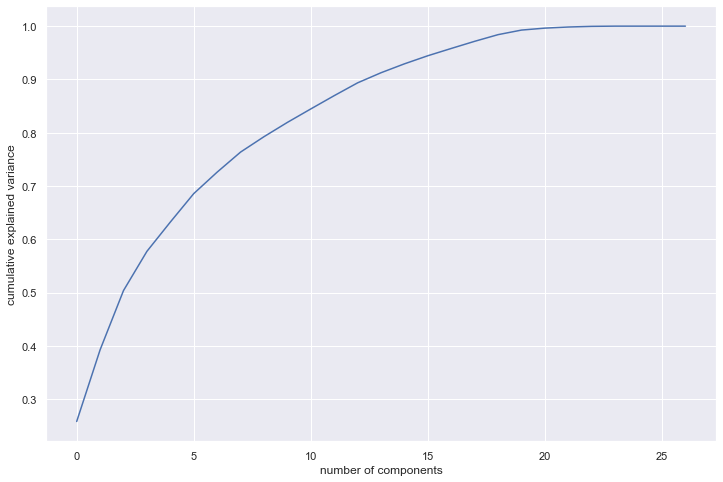

In [70]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
variance_cum = np.cumsum(pca.explained_variance_ratio_)
variance_cum[18] 

0.9840516043618551

#### Choosing 18 components as they contribute to 98% of variance in data

In [72]:
pca2 = PCA(n_components=18,random_state=100)
X_pca2 = pca2.fit_transform(X)
#X_test_pca2 = pca2.transform(X_test)
X_test_final_pca2 = pca2.transform(X_test_final)


In [73]:
print(X_pca2.shape)
#print(X_test_pca2.shape)
print(X_test_final_pca2.shape)

(69999, 18)
(30000, 18)


In [74]:
corrmat = np.corrcoef(X_pca2.transpose())

<AxesSubplot:>

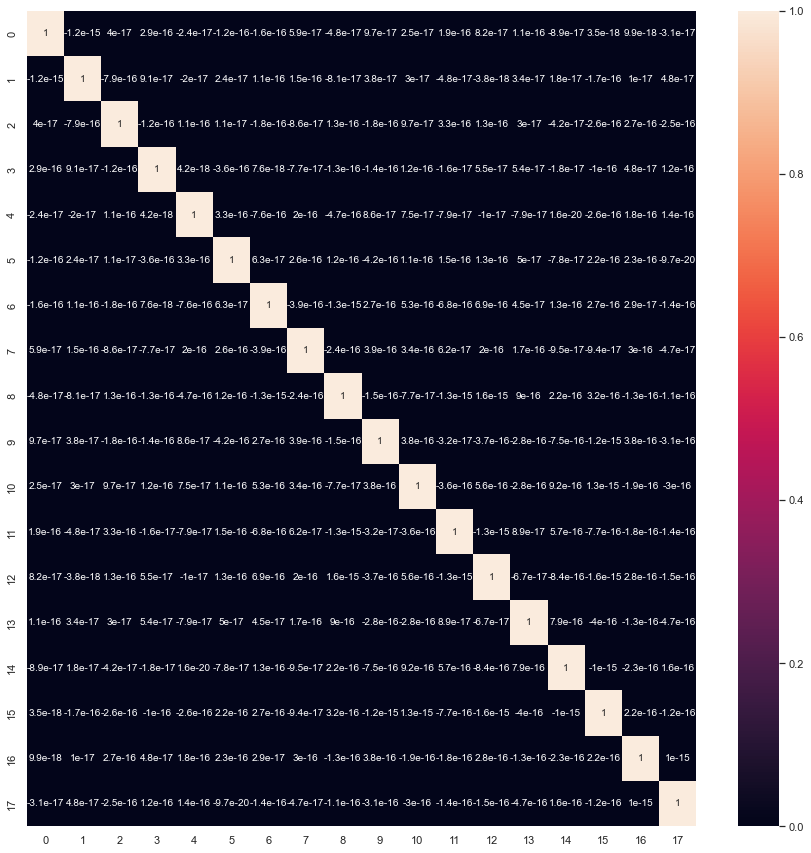

In [75]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### Ending "Feature Engineering and Variable Transformation" Section

### Model Selection, Model Building, and Prediction

#### Importing Libraries

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,precision_score ,f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold

#### Implementing Logistic Regression first

In [77]:
learner_pca = LogisticRegression()

In [78]:
model_pca = learner_pca.fit(X_pca2,y)

In [79]:
pred_probs_test_final = model_pca.predict_proba(X_test_final_pca2)

In [80]:
"{:2.2}".format(metrics.roc_auc_score(y_test_final, pred_probs_test_final[:,1]))

'0.81'

In [81]:
ypred_pca2=model_pca.predict(X_pca2)
print("Train Accuracy :%.4f" % accuracy_score(y, ypred_pca2))
print("Train ROC/AUC: %.4f" % roc_auc_score(y, ypred_pca2))
print("Train Precision Score: %.4f" % precision_score(y, ypred_pca2))
print("Train Recall Score: %.4f" % recall_score(y, ypred_pca2))
print("Train F1 Score: %.4f" % f1_score(y, ypred_pca2))

print("Train Confusion Matix is:")
print(confusion_matrix(y, ypred_pca2))
print("---"*20)


ypred_final_pca2=model_pca.predict(X_test_final_pca2)

print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_final_pca2))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_final_pca2))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_final_pca2))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_final_pca2))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_final_pca2))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final, ypred_final_pca2))

Train Accuracy :0.8980
Train ROC/AUC: 0.5062
Train Precision Score: 0.4787
Train Recall Score: 0.0142
Train F1 Score: 0.0275
Train Confusion Matix is:
[[62757   110]
 [ 7031   101]]
------------------------------------------------------------
Test Accuracy :0.8979
Test ROC/AUC: 0.5035
Test Precision Score: 0.4545
Test Recall Score: 0.0082
Test F1 Score: 0.0161
Test Confusion Matrix is :
[[26911    30]
 [ 3034    25]]


#### Implementing Random Forest

In [82]:
model_rf = RandomForestClassifier()

In [83]:
model_rf.fit(X_pca2,y)

RandomForestClassifier()

In [84]:
y_test_pred = model_rf.predict(X_test_final_pca2)

In [85]:
metrics.accuracy_score(y_test_final,y_test_pred)

0.8985333333333333

In [86]:
ypred_rf=model_rf.predict(X_test_final_pca2)
print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_rf))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_rf))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_rf))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_rf))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_rf))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final,ypred_rf))

Test Accuracy :0.8985
Test ROC/AUC: 0.5039
Test Precision Score: 0.7143
Test Recall Score: 0.0082
Test F1 Score: 0.0162
Test Confusion Matrix is :
[[26931    10]
 [ 3034    25]]


## Here we need our model to correctly predict the churn customers, so we will be looking into recall factor

## Implementing XGBOOST

In [ ]:
folds = 3
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)
params = {'max_depth':[3,5,7,9],
          'n_estimators':[300,400,500,600],
          'learning_rate':[0.1,0.2,0.3,0.4]
         }
classifier_xg=xgb.XGBClassifier(n_jobs=-1,
                                verbosity=1,
                                gpu_id=-1)
random_search = RandomizedSearchCV(classifier_xg,
                                   param_distributions=params,
                                   n_iter=param_comb, 
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=skf.split(X_pca2,y),
                                   verbose=3,
                                   random_state=100)

random_search.fit(X_pca2,y)

xg_boost_final =random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
xg_boost_final

In [ ]:
ypred_xg=xg_boost_final.predict(X_pca2)
print("Train Accuracy :%.4f" % accuracy_score(y, ypred_xg))
print("Train ROC/AUC: %.4f" % roc_auc_score(y, ypred_xg))
print("Train Precision Score: %.4f" % precision_score(y, ypred_xg))
print("Train Recall Score: %.4f" % recall_score(y, ypred_xg))
print("Train F1 Score: %.4f" % f1_score(y, ypred_xg))
print("Train Confusion Matix is:")
print(confusion_matrix(y, ypred_xg))
print("---"*20)


ypred_final_xg=xg_boost_final.predict(X_test_final_pca2)

print("Test Accuracy :%.4f" % accuracy_score(y_test_final, ypred_final_xg))
print("Test ROC/AUC: %.4f" % roc_auc_score(y_test_final, ypred_final_xg))
print("Test Precision Score: %.4f" % precision_score(y_test_final, ypred_final_xg))
print("Test Recall Score: %.4f" % recall_score(y_test_final, ypred_final_xg))
print("Test F1 Score: %.4f" % f1_score(y_test_final, ypred_final_xg))
print("Test Confusion Matrix is :")
print(confusion_matrix(y_test_final, ypred_final_xg))


### Ending Section "Model Selection, Model Building, and Prediction"

### Extracting the output

In [ ]:
df1=pd.DataFrame(ypred_final_xg,columns=['churn_probability'])

In [ ]:
df1['churn_probability'].value_counts()

In [ ]:
df_output=pd.concat([df_output,pd.DataFrame(ypred_final_xg,columns=['churn_probability'])],axis=1)


In [ ]:
df_output['churn_probability']=df_output['churn_probability'].astype('int')

In [ ]:
df_output.to_csv('solutions.csv',index=False)